<a href="https://colab.research.google.com/github/SonHyeok/Foreigner-in-korea/blob/main/Foreigner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 국내 체류 외국인 현황 조사



# 라이브러리 import



In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [204]:
#한글폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#한글폰트 설정
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# csv파일 불러오기

In [205]:
df = pd.read_csv('/content/drive/MyDrive/개인 공공데이터 분석 자료/data/법무부_외국인체류데이터_20191231.csv', encoding = 'cp949')

# 데이터 프레임 확인

In [206]:
df.head()

,대륙,국적,성별,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),D-8(기업투자),D-9(무역경영),D-10(구직),E-1(교수),E-2(회화강사),E-3(연구),E-4(기술지도),E-5(전문직업),E-6(예술흥행),E-7(특정활동),E-9(비전문취업),E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
0,아시아주,한국계중국인,남성,1.0,465.0,80.0,130.0,1.0,1.0,12.0,35.0,2.0,NaN,3.0,NaN,2.0,NaN,NaN,4.0,18.0,352.0,1.0,9474.0,5207.0,18.0,47026.0,6693.0,162.0,NaN,117420.0,5.0
1,아시아주,한국계중국인,여성,1.0,682.0,59.0,112.0,NaN,NaN,1.0,19.0,2.0,NaN,3.0,3.0,1.0,NaN,NaN,NaN,6.0,257.0,NaN,10679.0,5729.0,35.0,41833.0,10683.0,70.0,NaN,75235.0,3.0
2,아시아주,중국,남성,10.0,22044.0,375.0,4651.0,10.0,11.0,246.0,764.0,109.0,899.0,88.0,44.0,232.0,1.0,NaN,121.0,6177.0,1989.0,2601.0,14275.0,6863.0,551.0,11234.0,4467.0,2779.0,NaN,16.0,272.0
3,아시아주,중국,여성,6.0,37619.0,253.0,5082.0,11.0,28.0,79.0,221.0,33.0,1404.0,78.0,708.0,90.0,NaN,NaN,97.0,3466.0,274.0,1.0,22374.0,10856.0,1163.0,22213.0,19586.0,1325.0,NaN,17.0,268.0
4,아시아주,베트남,남성,2.0,8120.0,81.0,20420.0,NaN,37.0,26.0,20.0,5.0,271.0,28.0,NaN,167.0,1.0,NaN,14.0,1910.0,32979.0,8030.0,13180.0,1187.0,474.0,372.0,2691.0,672.0,NaN,NaN,108.0


In [207]:
df.tail()

,대륙,국적,성별,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),D-8(기업투자),D-9(무역경영),D-10(구직),E-1(교수),E-2(회화강사),E-3(연구),E-4(기술지도),E-5(전문직업),E-6(예술흥행),E-7(특정활동),E-9(비전문취업),E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
366,기타,무국적,여성,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,10.0,NaN,1.0,8.0,1.0,NaN,NaN,NaN
367,기타,미등록국가,남성,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,기타,미등록국가,여성,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
369,기타,국제연합,남성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
370,기타,국제연합,여성,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   대륙          371 non-null    object 
 1   국적          371 non-null    object 
 2   성별          371 non-null    object 
 3   D-1(문화예술)   30 non-null     float64
 4   D-2(유학)     332 non-null    float64
 5   D-3(기술연수)   23 non-null     float64
 6   D-4(일반연수)   281 non-null    float64
 7   D-5(취재)     18 non-null     float64
 8   D-6(종교)     132 non-null    float64
 9   D-7(주재)     85 non-null     float64
 10  D-8(기업투자)   150 non-null    float64
 11  D-9(무역경영)   130 non-null    float64
 12  D-10(구직)    196 non-null    float64
 13  E-1(교수)     138 non-null    float64
 14  E-2(회화강사)   56 non-null     float64
 15  E-3(연구)     140 non-null    float64
 16  E-4(기술지도)   40 non-null     float64
 17  E-5(전문직업)   69 non-null     float64
 18  E-6(예술흥행)   135 non-null    float64
 19  E-7(특정활동)   222 non-null    f

In [209]:
df.isnull().sum()

대륙              0
국적              0
성별              0
D-1(문화예술)     341
D-2(유학)        39
D-3(기술연수)     348
D-4(일반연수)      90
D-5(취재)       353
D-6(종교)       239
D-7(주재)       286
D-8(기업투자)     221
D-9(무역경영)     241
D-10(구직)      175
E-1(교수)       233
E-2(회화강사)     315
E-3(연구)       231
E-4(기술지도)     331
E-5(전문직업)     302
E-6(예술흥행)     236
E-7(특정활동)     149
E-9(비전문취업)    312
E-10(선원취업)    358
F-1(방문동거)     158
F-2(거주)       126
F-3(동반)       120
F-5(영주)       187
F-6(결혼이민)     102
G-1(기타)       182
H-1(관광취업)     321
H-2(방문취업)     352
기타(other)     100
dtype: int64

In [210]:
df['대륙'].value_counts()

# 아프리카에 나라가 가장 많은걸 알 수 있음

아프리카주     101
아시아주       94
유럽주        91
남아메리카주     59
오세아니아주     16
기타          6
북아메리카주      4
Name: 대륙, dtype: int64

In [211]:
df['국적'].value_counts()

루마니아      2
크로아티아     2
탄자니아      2
팔레스타인     2
도미니카연방    2
         ..
가이아나      1
안도라       1
수리남       1
바하마       1
바누아투      1
Name: 국적, Length: 192, dtype: int64

In [212]:
df = df.fillna(0)
# 결측치를 0으로 채운 후 결측값이 잘 채워 졌는지 확인.

In [213]:
df.isnull().sum()

대륙            0
국적            0
성별            0
D-1(문화예술)     0
D-2(유학)       0
D-3(기술연수)     0
D-4(일반연수)     0
D-5(취재)       0
D-6(종교)       0
D-7(주재)       0
D-8(기업투자)     0
D-9(무역경영)     0
D-10(구직)      0
E-1(교수)       0
E-2(회화강사)     0
E-3(연구)       0
E-4(기술지도)     0
E-5(전문직업)     0
E-6(예술흥행)     0
E-7(특정활동)     0
E-9(비전문취업)    0
E-10(선원취업)    0
F-1(방문동거)     0
F-2(거주)       0
F-3(동반)       0
F-5(영주)       0
F-6(결혼이민)     0
G-1(기타)       0
H-1(관광취업)     0
H-2(방문취업)     0
기타(other)     0
dtype: int64

In [214]:
df.columns

Index(['대륙', '국적', '성별', 'D-1(문화예술)', 'D-2(유학)', 'D-3(기술연수)', 'D-4(일반연수)',
       'D-5(취재)', 'D-6(종교)', 'D-7(주재)', 'D-8(기업투자)', 'D-9(무역경영)', 'D-10(구직)',
       'E-1(교수)', 'E-2(회화강사)', 'E-3(연구)', 'E-4(기술지도)', 'E-5(전문직업)',
       'E-6(예술흥행)', 'E-7(특정활동)', 'E-9(비전문취업)', 'E-10(선원취업)', 'F-1(방문동거)',
       'F-2(거주)', 'F-3(동반)', 'F-5(영주)', 'F-6(결혼이민)', 'G-1(기타)', 'H-1(관광취업)',
       'H-2(방문취업)', '기타(other)'],
      dtype='object')

In [215]:
columns = ['D-1(문화예술)', 'D-2(유학)', 'D-3(기술연수)', 'D-4(일반연수)',
       'D-5(취재)', 'D-6(종교)', 'D-7(주재)', 'D-8(기업투자)', 'D-9(무역경영)', 'D-10(구직)',
       'E-1(교수)', 'E-2(회화강사)', 'E-3(연구)', 'E-4(기술지도)', 'E-5(전문직업)',
       'E-6(예술흥행)', 'E-7(특정활동)', 'E-9(비전문취업)', 'E-10(선원취업)', 'F-1(방문동거)',
       'F-2(거주)', 'F-3(동반)', 'F-5(영주)', 'F-6(결혼이민)', 'G-1(기타)', 'H-1(관광취업)',
       'H-2(방문취업)', '기타(other)']
      

# 새로운 데이터 프레임 생성

In [216]:
df_sum = pd.pivot_table(df, index = ['대륙','국적','성별'],  values = columns, aggfunc='sum')
df_sum = df_sum.astype('int')
df_sum.head(10)

D-1(문화예술)  D-10(구직)  D-2(유학)  ...  H-1(관광취업)  H-2(방문취업)  기타(other)
대륙     국적    성별                                ...                                 
기타     국제연합  남성          0         0        0  ...          0          0         14
             여성          0         0        0  ...          0          0         11
       무국적   남성          0         0        3  ...          0          1          0
             여성          0         0        0  ...          0          0          0
       미등록국가 남성          0         1        8  ...          0          0          0
             여성          0         1        5  ...          0          0          0
남아메리카주 가이아나  남성          0         0        0  ...          0          0          1
       과테말라  남성          0         4        7  ...          0          0          4
             여성          0         0        8  ...          0          0          3
       그레나다  남성          0         0        0  ...          0          0          0

[10 rows x 28 columns]

In [217]:
df_sum.tail(10)

D-1(문화예술)  D-10(구직)  D-2(유학)  ...  H-1(관광취업)  H-2(방문취업)  기타(other)
대륙  국적      성별                                ...                                 
유럽주 폴란드     남성          0         2       22  ...          1          0          5
            여성          0         2       74  ...         28          0          7
    프랑스     남성          1        13      490  ...        140          0         48
            여성          0        15      542  ...        301          0         49
    핀란드     남성          0         1       36  ...          0          0          0
            여성          0         3       47  ...          0          0          2
    한국계러시아인 남성          0         0        3  ...          0          8          0
            여성          0         0        3  ...          0          4          1
    헝가리     남성          0         0        9  ...          3          0         10
            여성          0         3       31  ...         12          0         12

[10 rows x 28 columns]

# 체류 목적 데이터 시각화

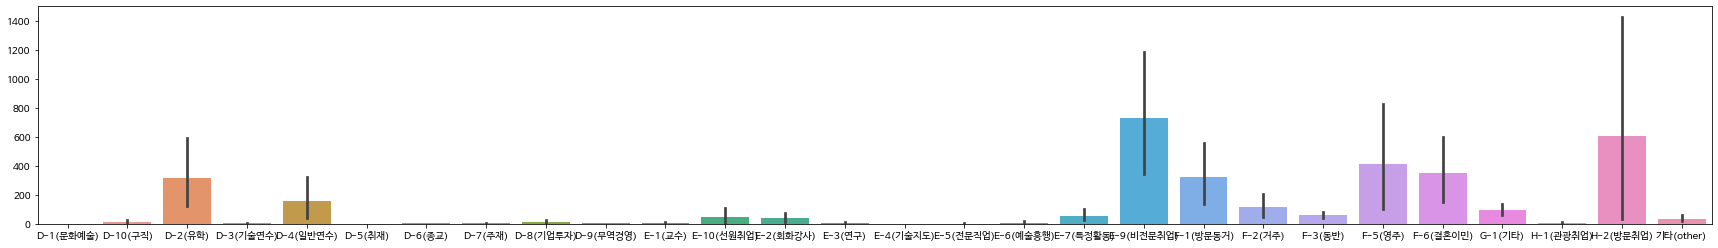

In [218]:
plt.figure(figsize = (30,4))
sns.barplot(data=df_sum)

# 각 대륙별 체류 인원 시각화

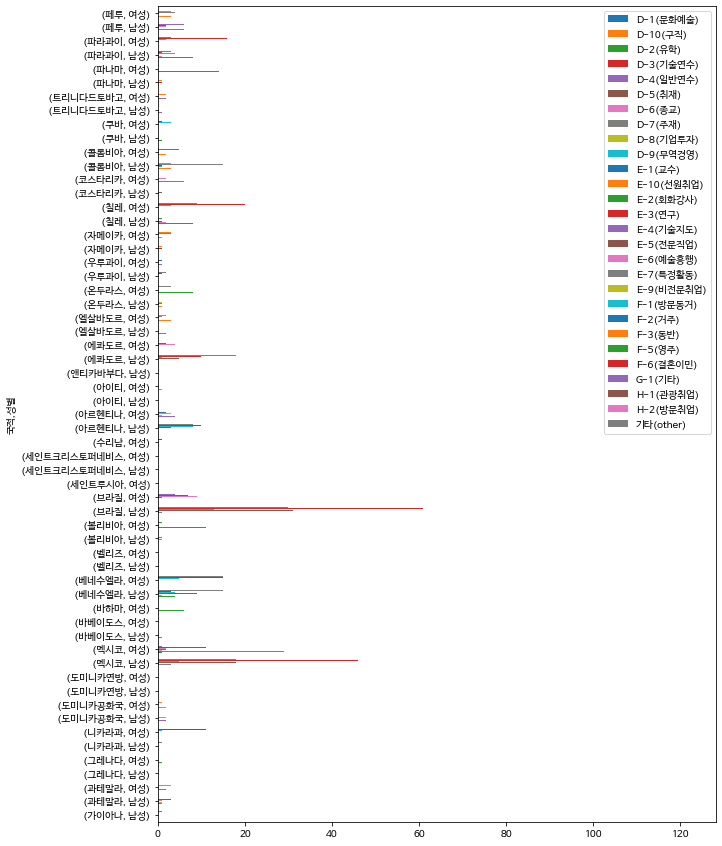

In [219]:
df_sum.loc['남아메리카주'].plot.barh(figsize = (10,15))

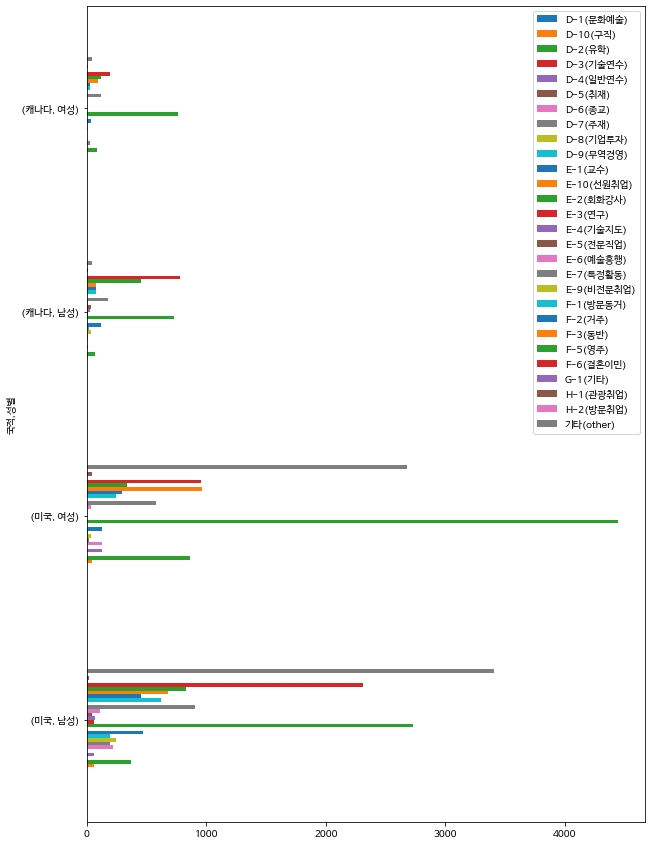

In [220]:
df_sum.loc['북아메리카주'].plot.barh(figsize = (10,15))

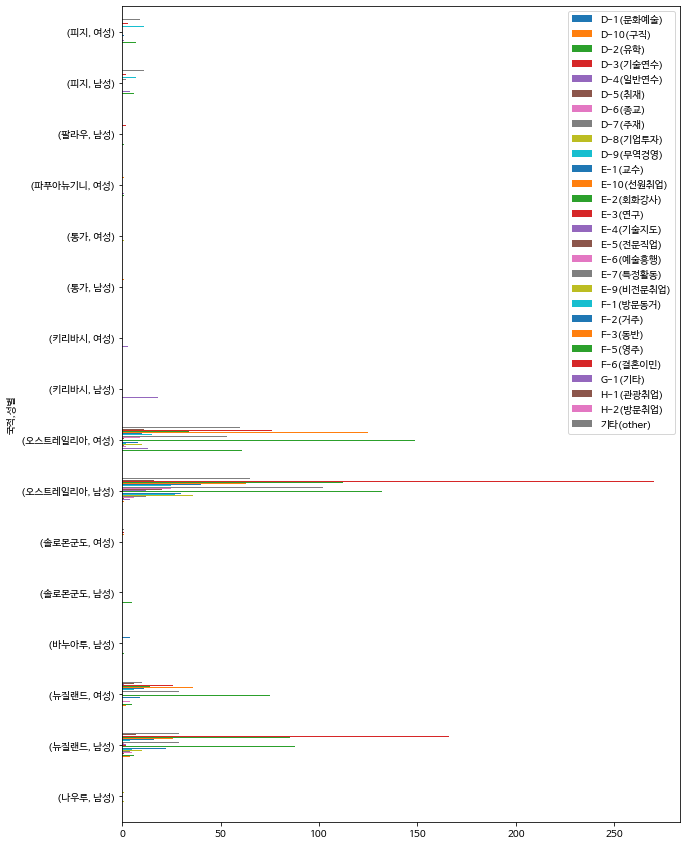

In [221]:
df_sum.loc['오세아니아주'].plot.barh(figsize = (10,15))

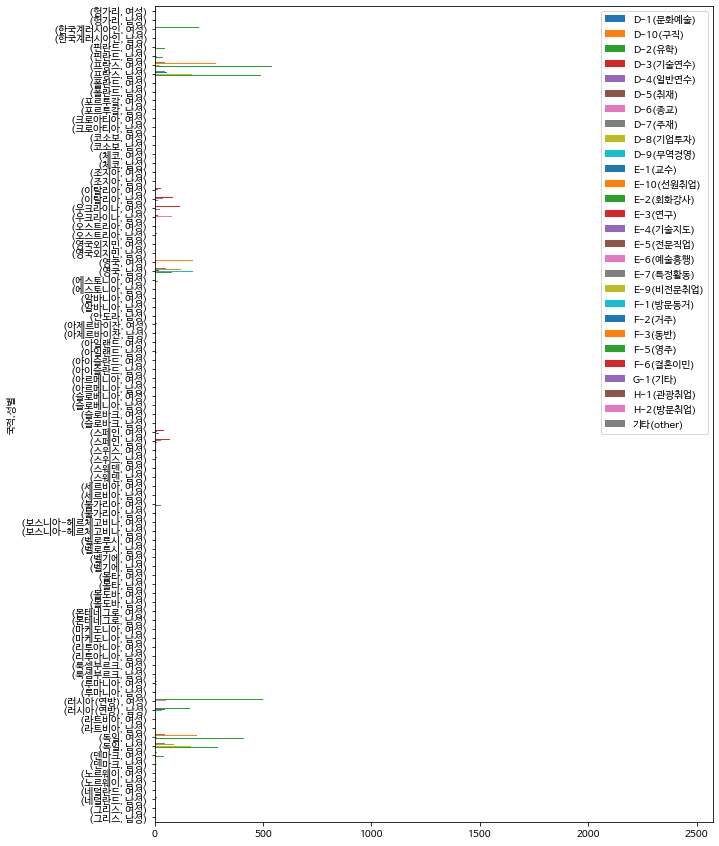

In [222]:
df_sum.loc['유럽주'].plot.barh(figsize = (10,15))

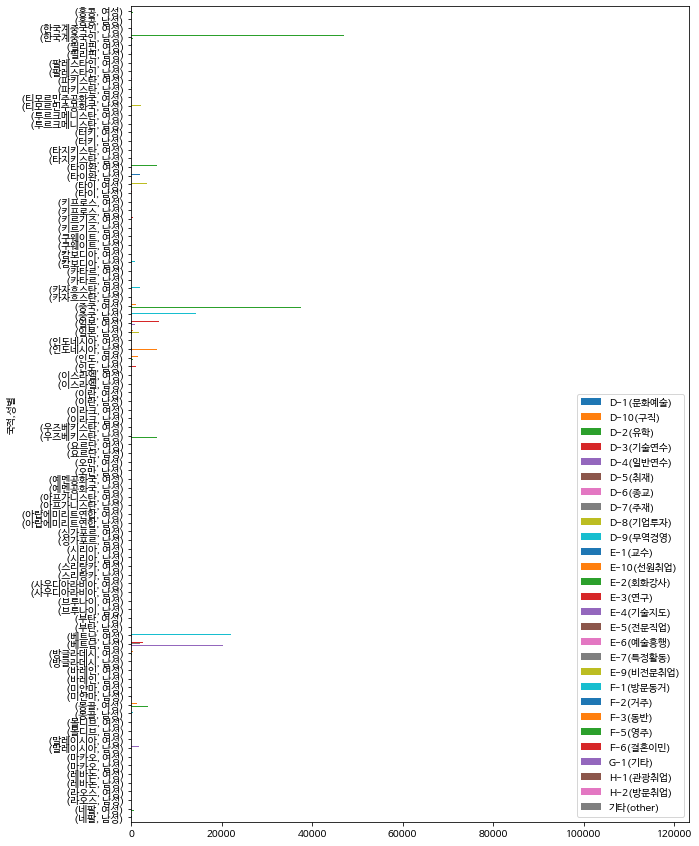

In [223]:
df_sum.loc['아시아주'].plot.barh(figsize = (10,15))

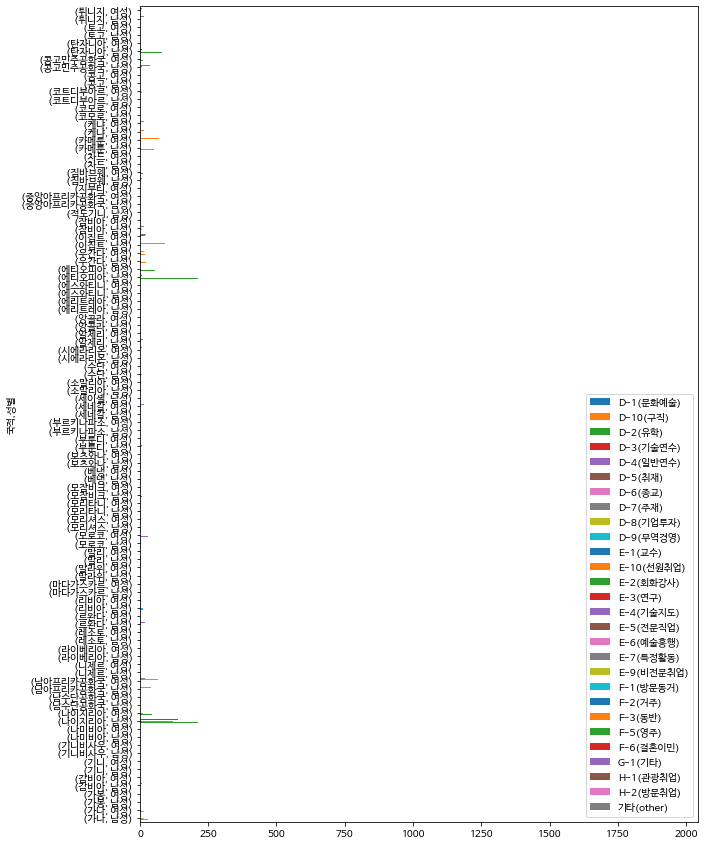

In [224]:
df_sum.loc['아프리카주'].plot.barh(figsize = (10,15))

# 성별 구분 없는 데이터 프레임 생성

In [225]:
df_mid = pd.pivot_table(df, index = ['대륙','국적'],  values = columns, aggfunc='sum')
df_mid = df_mid.astype('int')
df_mid


D-1(문화예술)  D-10(구직)  D-2(유학)  ...  H-1(관광취업)  H-2(방문취업)  기타(other)
대륙     국적                                     ...                                 
기타     국제연합             0         0        0  ...          0          0         25
       무국적              0         0        3  ...          0          1          0
       미등록국가            0         2       13  ...          0          0          0
남아메리카주 가이아나             0         0        0  ...          0          0          1
       과테말라             0         4       15  ...          0          0          7
...                   ...       ...      ...  ...        ...        ...        ...
유럽주    폴란드              0         4       96  ...         29          0         12
       프랑스              1        28     1032  ...        441          0         97
       핀란드              0         4       83  ...          0          0          2
       한국계러시아인          0         0        6  ...          0         12          1
       헝가리              0         3       40  ...         15          0         22

[192 rows x 28 columns]

# 방문 사유를 대분류로 분류

In [226]:
df_last = df_mid.copy()

In [227]:
df_last['취업'] = df_mid['D-10(구직)'] + df_mid['E-10(선원취업)'] + df_mid['E-2(회화강사)'] + df_mid['E-9(비전문취업)'] + df_mid['E-5(전문직업)'] + df_mid['E-4(기술지도)'] + df_mid['H-1(관광취업)'] + df_mid['H-2(방문취업)']
df_last['거주'] = df_mid['F-2(거주)'] + df_mid['F-1(방문동거)'] + df_mid['F-3(동반)'] + df_mid['F-5(영주)'] + df_mid['F-6(결혼이민)']
df_last['학업'] = df_mid['D-2(유학)'] + df_mid['D-3(기술연수)'] + df_mid['D-4(일반연수)'] + df_mid['E-3(연구)']
df_last['국외활동'] = df_mid['D-8(기업투자)'] + df_mid['D-7(주재)'] + df_mid['D-9(무역경영)']
df_last['기타'] = df_mid['D-5(취재)'] + df_mid['D-6(종교)'] + df_mid['D-1(문화예술)'] + df_mid['E-6(예술흥행)'] + df_mid['E-7(특정활동)'] + df_mid['G-1(기타)'] + df_mid['기타(other)']

In [228]:
df_last = df_last.drop(['D-1(문화예술)','D-10(구직)'	,'D-2(유학)'	,'D-3(기술연수)'	,'D-4(일반연수)'	,'D-5(취재)'	,'D-6(종교)'	,'D-7(주재)','D-8(기업투자)'	,'D-9(무역경영)'	,'E-1(교수)'	,'E-10(선원취업)'	,'E-2(회화강사)'	,'E-3(연구)'	,'E-4(기술지도)'	,'E-5(전문직업)'	,'E-6(예술흥행)'	,'E-7(특정활동)'	,'E-9(비전문취업)'	,'F-1(방문동거)'	,'F-2(거주)'	,'F-3(동반)'	,'F-5(영주)'	,'F-6(결혼이민)'	,'G-1(기타)'	,'H-1(관광취업)'	,'H-2(방문취업)'	,'기타(other)'],axis = 1)
df_last = df_last.astype('int')
# 필요 없어진 데이터는 drop으로 삭제


In [229]:
df_last

취업    거주    학업  국외활동   기타
대륙     국적                                 
기타     국제연합       0     0     0     0   25
       무국적        1    94     4     0    7
       미등록국가      2    32    14     0    0
남아메리카주 가이아나       0     0     0     0    1
       과테말라       4    29    24     1    9
...             ...   ...   ...   ...  ...
유럽주    폴란드       35   133   125    27   48
       프랑스      513  1147  1221   334  431
       핀란드        5    49    92    16    9
       한국계러시아인   12  1330    13     0    5
       헝가리       18    52    48     3   40

[192 rows x 5 columns]

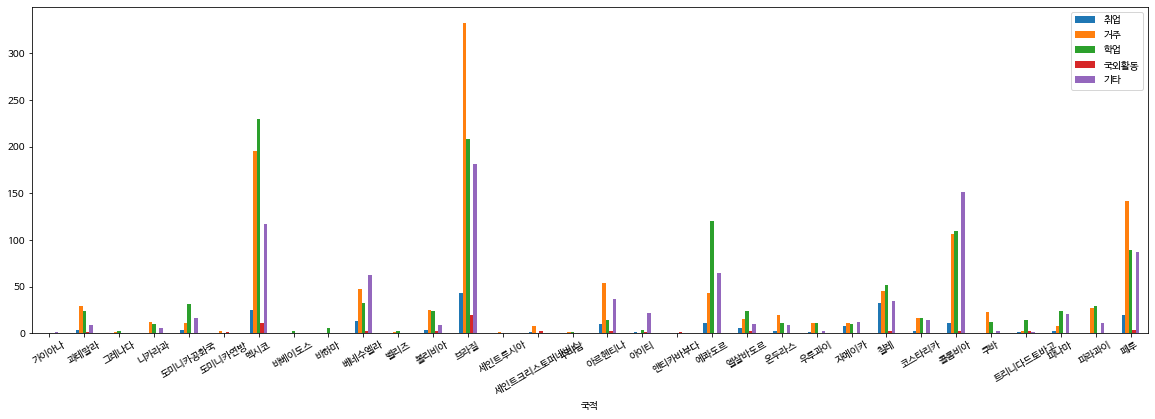

In [230]:
df_last.loc['남아메리카주'].plot.bar(figsize = (20,6), rot = 30)

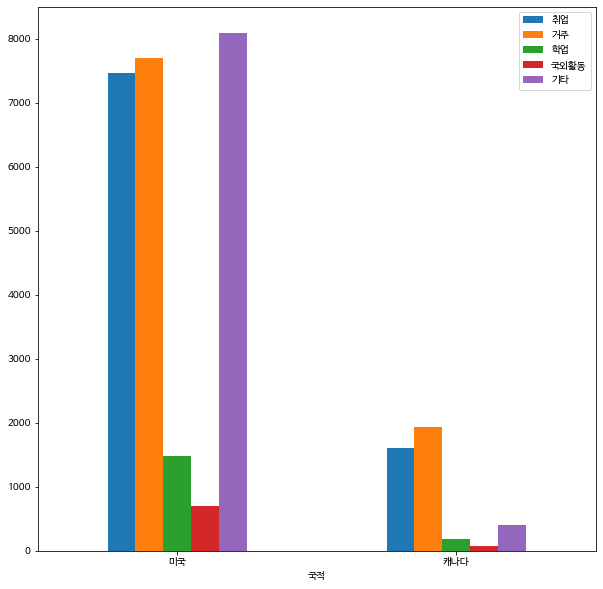

In [231]:
df_last.loc['북아메리카주'].plot.bar(figsize = (10,10),rot = 0)

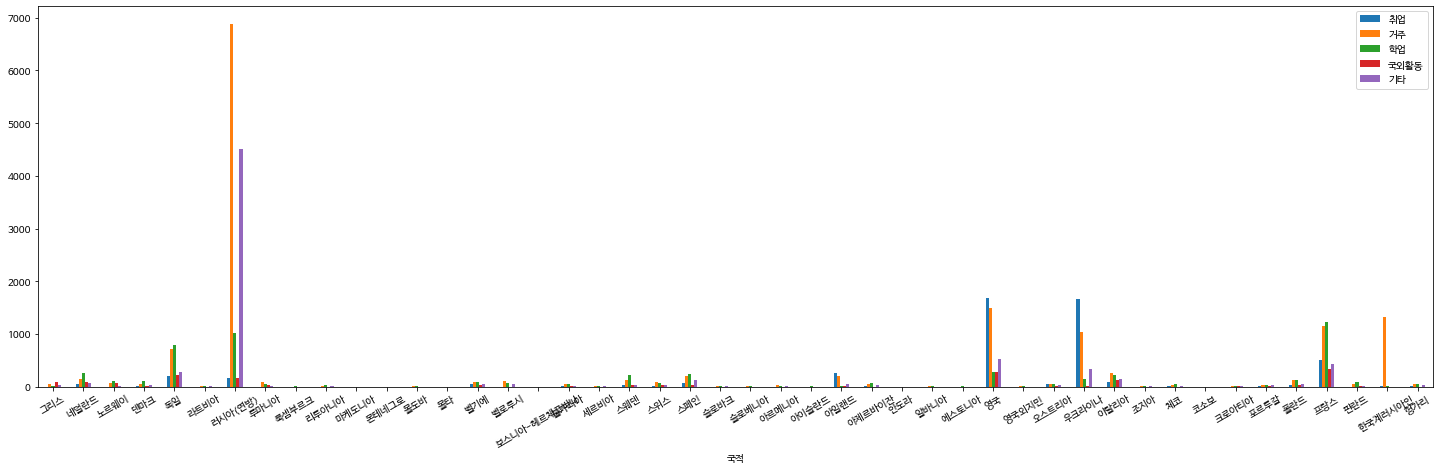

In [232]:
df_last.loc['유럽주'].plot.bar(figsize = (25,7), rot= 30)

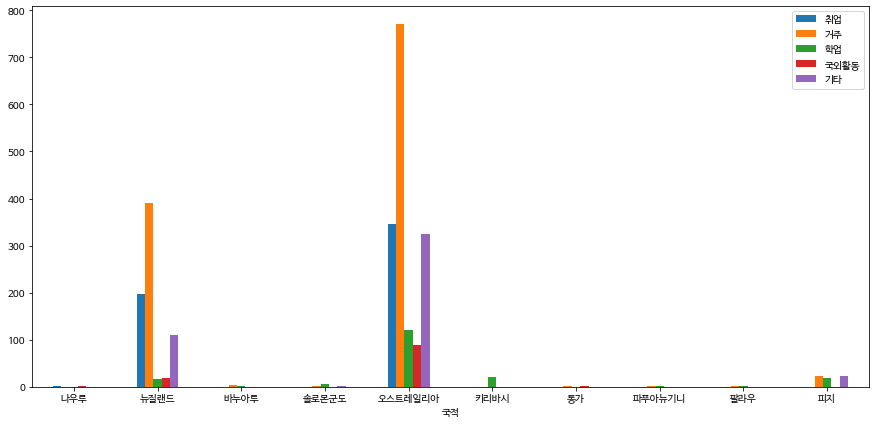

In [233]:
df_last.loc['오세아니아주'].plot.bar(figsize = (15,7), rot = 0)

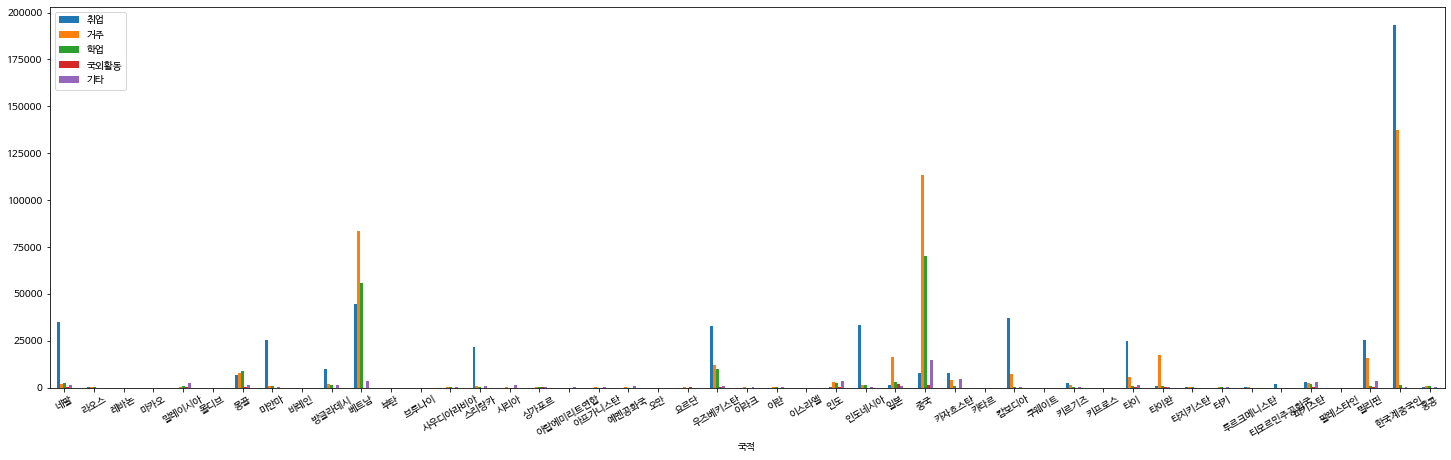

In [234]:
df_last.loc['아시아주'].plot.bar(figsize = (25,7),rot = 30)

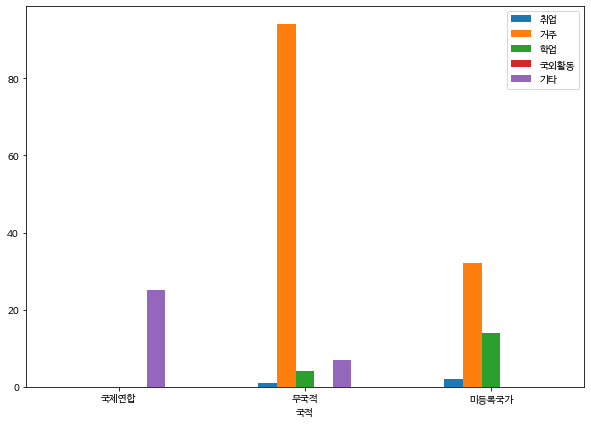

In [235]:
df_last.loc['기타'].plot.bar(figsize = (10,7), rot = 0)

# 각 국가별로 체류중인 외국인의 총 인원 컬럼을 df_final에 생성


In [236]:
df_final = df_last.copy()

In [237]:
df_final['총 인원'] = df_last['취업'] + df_last['거주'] + df_last['국외활동'] + df_last['기타'] + df_last['학업']
df_final = df_final.astype('int')

In [238]:
df_final

취업    거주    학업  국외활동   기타  총 인원
대륙     국적                                       
기타     국제연합       0     0     0     0   25    25
       무국적        1    94     4     0    7   106
       미등록국가      2    32    14     0    0    48
남아메리카주 가이아나       0     0     0     0    1     1
       과테말라       4    29    24     1    9    67
...             ...   ...   ...   ...  ...   ...
유럽주    폴란드       35   133   125    27   48   368
       프랑스      513  1147  1221   334  431  3646
       핀란드        5    49    92    16    9   171
       한국계러시아인   12  1330    13     0    5  1360
       헝가리       18    52    48     3   40   161

[192 rows x 6 columns]

In [239]:
df_final.loc['남아메리카주','총 인원'].sum()

3446

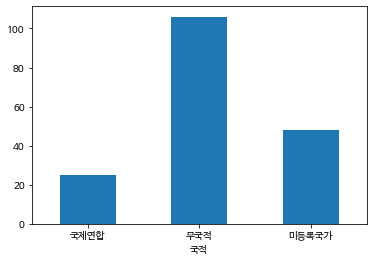

In [240]:
df_final.loc['기타','총 인원'].plot.bar(rot = 0)

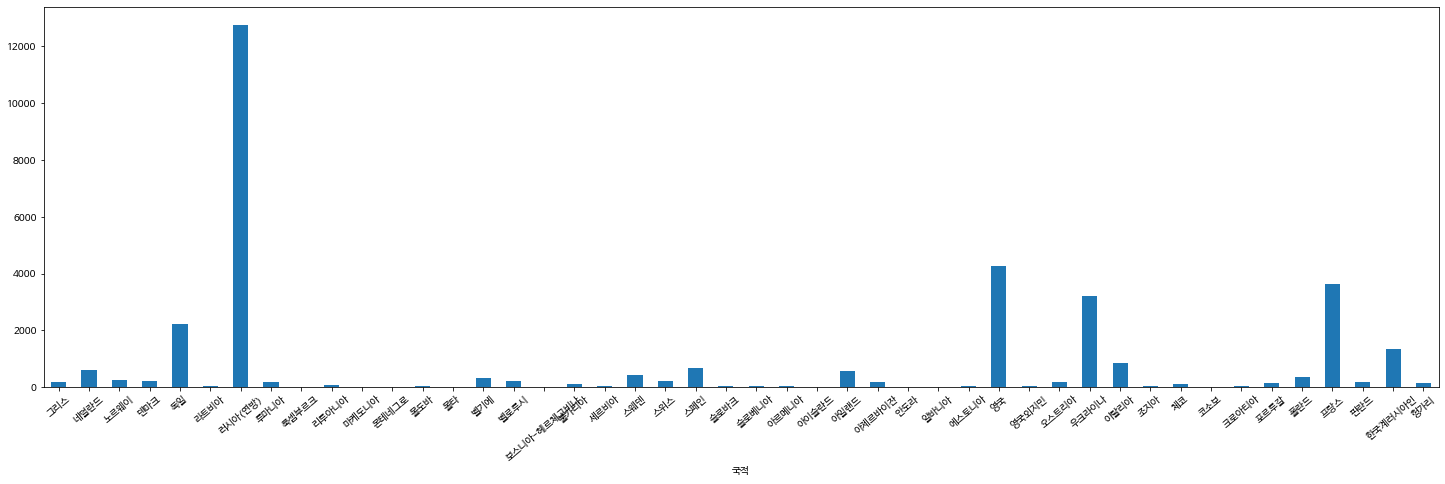

In [241]:
df_final.loc['유럽주','총 인원'].plot.bar(figsize = (25,7), rot = 40)

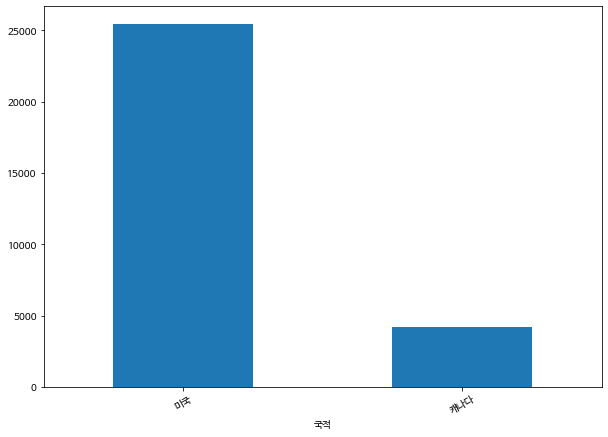

In [242]:
df_final.loc['북아메리카주','총 인원'].plot.bar(figsize = (10,7), rot = 30)

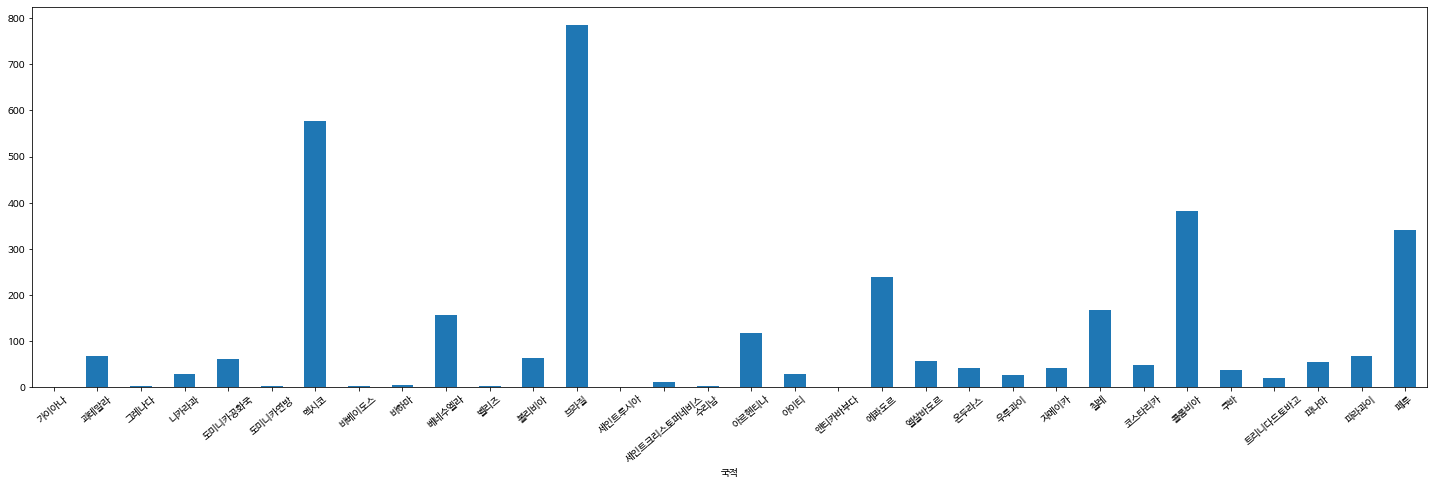

In [243]:
df_final.loc['남아메리카주','총 인원'].plot.bar(figsize = (25,7), rot = 40)

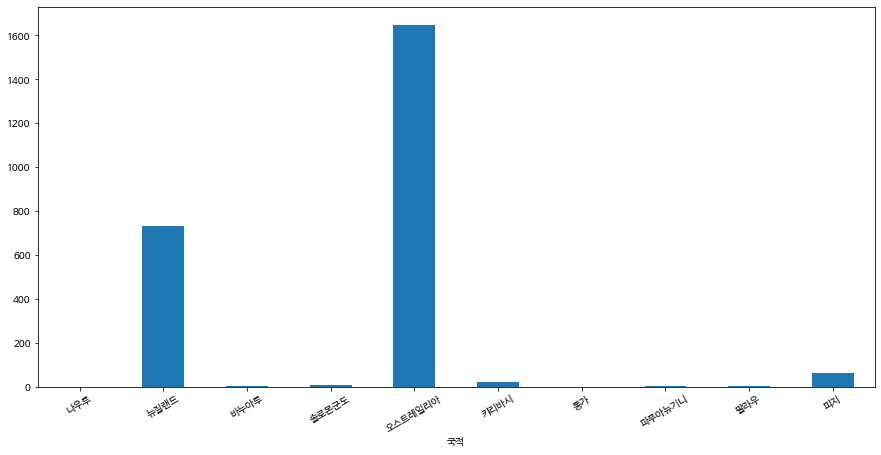

In [244]:
df_final.loc['오세아니아주','총 인원'].plot.bar(figsize = (15,7), rot = 30)

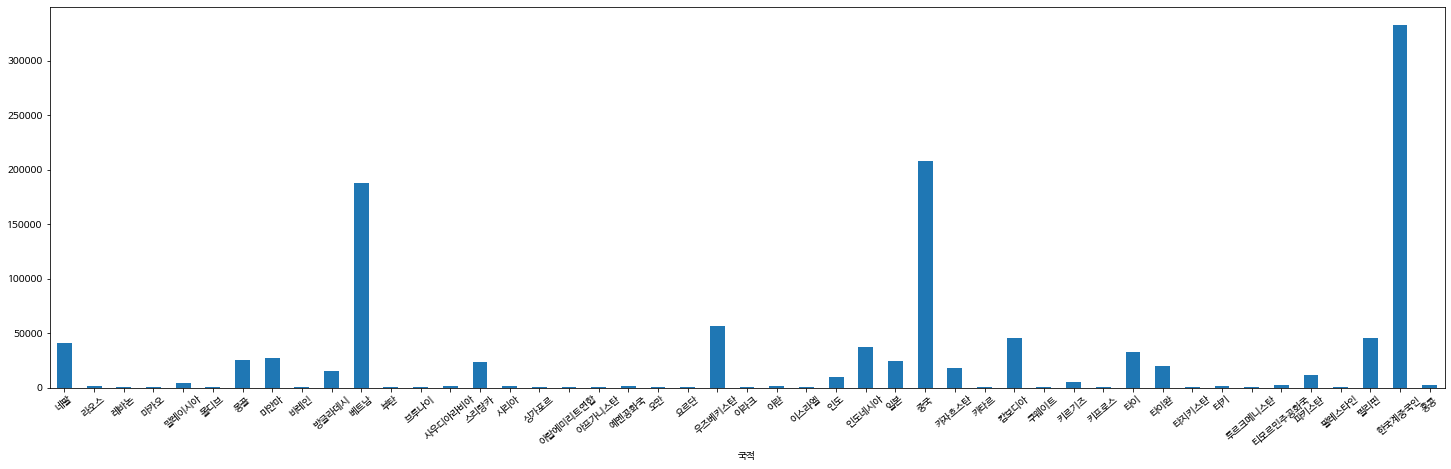

In [245]:
df_final.loc['아시아주','총 인원'].plot.bar(figsize = (25,7), rot = 40)

## 전체 인원중 목적별 체류 인원 합계 


In [246]:
df_sum = df_final.sum().to_frame().copy()
df_sum

,0
취업,534378
거주,469017
학업,181330
국외활동,9570
기타,75329
총 인원,1269624


In [247]:
trace1 = go.Bar(x=df_sum.index, y=df_sum[0])
data1 = [trace1]
layout1 = go.Layout(title='취업 목적별 총 체류 인원')
fig1 = go.Figure(data=data1, layout=layout1)
pyo.iplot(fig1)

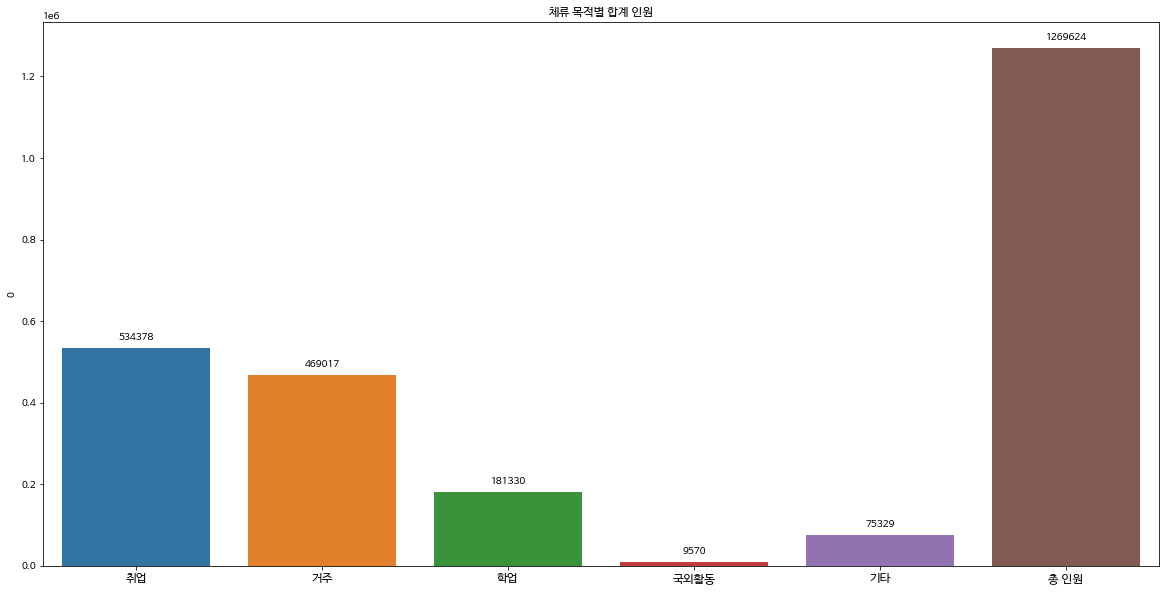

In [248]:
plt.figure(figsize=(20,10))
g = sns.barplot(data = df_sum, x = df_sum.index, y = 0, ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('체류 목적별 합계 인원')
plt.show()

## 전체 인원중 대륙별 인원 합계

In [249]:
others = df_final.loc['기타','총 인원'].sum()
eur = df_final.loc['유럽주','총 인원'].sum()
s_america = df_final.loc['남아메리카주','총 인원'].sum()
n_america = df_final.loc['북아메리카주','총 인원'].sum()
asia = df_final.loc['아시아주','총 인원'].sum()
os = df_final.loc['오세아니아주','총 인원'].sum()
all = others + eur + s_america + n_america + asia + os


In [250]:
continent_data = {'총 인원':pd.Series([asia,eur,os,n_america,s_america,others,all],['아시아주','유럽주','오세아니아주','북아메리카주','남아메리카주','기타','전체 합계'])}
df_continent = pd.DataFrame(continent_data)
df_continent

,총 인원
아시아주,1182408
유럽주,34391
오세아니아주,2489
북아메리카주,29623
남아메리카주,3446
기타,179
전체 합계,1252536


In [251]:
trace2 = go.Bar(x=df_continent.index, y=df_continent['총 인원'])
data2 = [trace2]
layout2 = go.Layout(title='대륙별 총 체류 인원')
fig2 = go.Figure(data=data2, layout=layout2)
pyo.iplot(fig2)

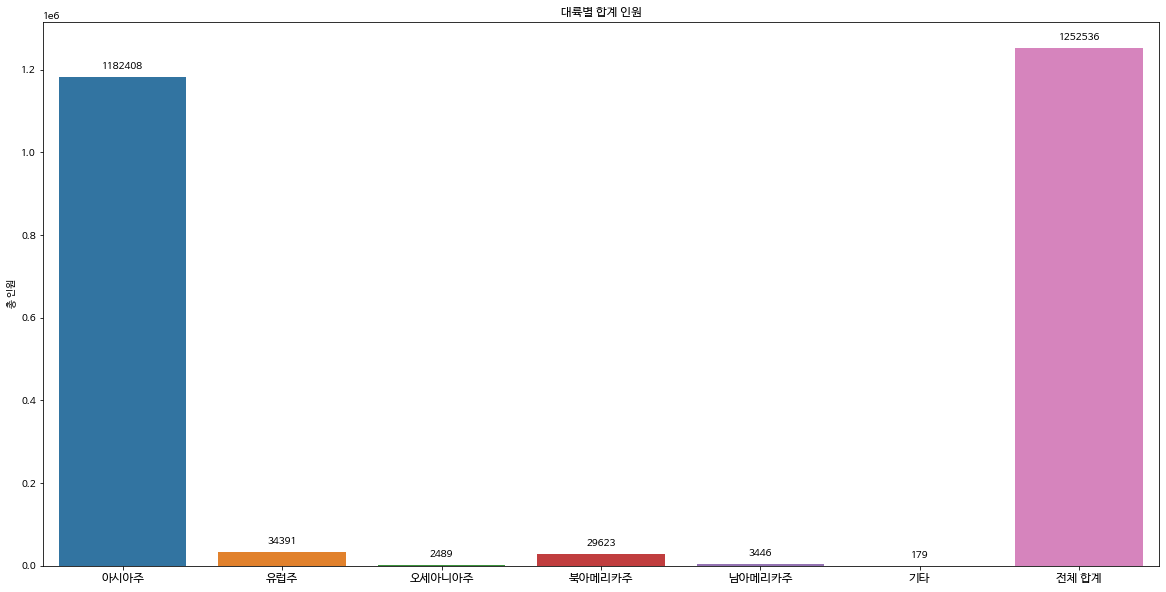

In [252]:
plt.figure(figsize=(20,10))
g_continent = sns.barplot(data = df_continent, x = df_continent.index, y = '총 인원', ci=None)

for p in g_continent.patches:
    g_continent.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('대륙별 합계 인원')
plt.show()

# 대륙별 총 인원수 상위 3개의 나라 확인

## 남아메리카주 상위 3개 나라

In [253]:
df_final.loc['남아메리카주'].sort_values(by='총 인원', ascending=False)

,취업,거주,학업,국외활동,기타,총 인원
국적,,,,,,
브라질,43,333,208,20,181,785
멕시코,25,195,230,11,117,578
콜롬비아,11,106,110,3,152,382
페루,20,142,89,4,87,342
에콰도르,11,43,120,0,65,239
칠레,33,45,52,3,35,168
베네수엘라,13,47,32,2,62,156
아르헨티나,10,54,14,2,37,117
파라과이,0,27,29,0,11,67


In [254]:
north_data = {'총 인원':pd.Series([785,578,382],['브라질','멕시코','콜롬비아'])}
df_north = pd.DataFrame(north_data)
df_north

,총 인원
브라질,785
멕시코,578
콜롬비아,382


In [255]:
trace3 = go.Bar(x=df_north.index, y=df_north['총 인원'])
data = [trace3]
layout3 = go.Layout(title='남아메리카주 체류 인원수 상위 3개')
fig3 = go.Figure(data=data, layout=layout3)
pyo.iplot(fig3)

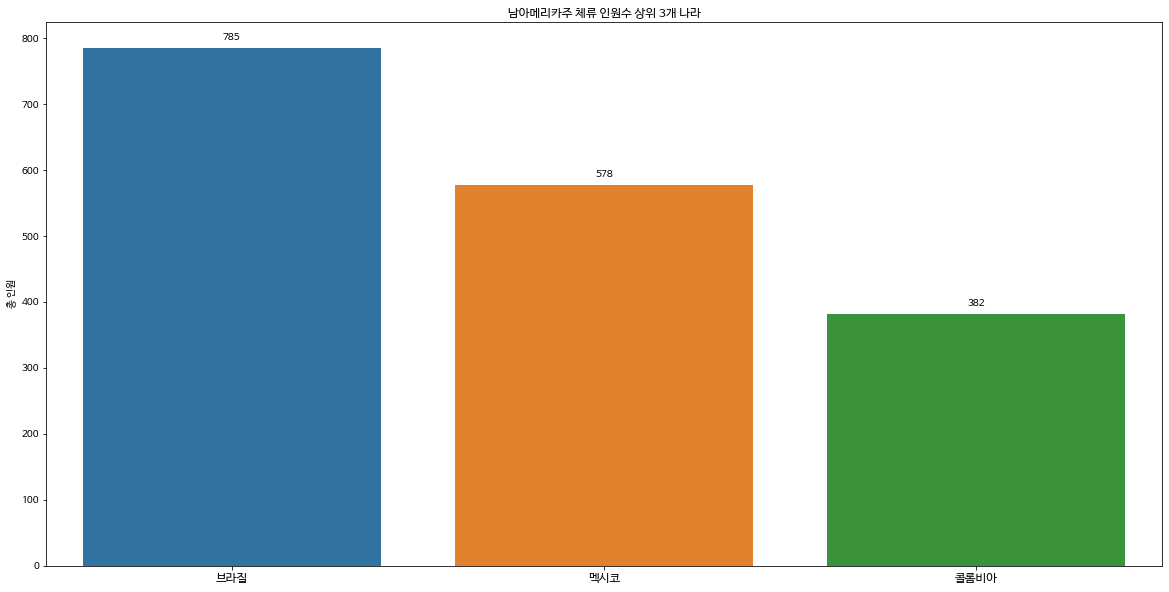

In [256]:
plt.figure(figsize=(20,10))
g_south = sns.barplot(data = df_north, x = df_north.index, y = '총 인원', ci=None)

for p in g_south.patches:
    g_south.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('남아메리카주 체류 인원수 상위 3개 나라')
plt.show()

## 북아메리카주 상위 3개 나라

In [257]:
df_final.loc['북아메리카주'].sort_values(by='총 인원', ascending=False)

,취업,거주,학업,국외활동,기타,총 인원
국적,,,,,,
미국,7461,7693,1488,697,8085,25424
캐나다,1600,1927,192,72,408,4199


In [258]:
south_data = {'총 인원':pd.Series([25424,4199],['미국','캐나다'])}
df_south = pd.DataFrame(south_data)
df_south

,총 인원
미국,25424
캐나다,4199


In [259]:
trace4 = go.Bar(x=df_south.index, y=df_south['총 인원'])
data = [trace4]
layout4 = go.Layout(title='북아메리카주 체류 인원수 상위 3개')
fig4 = go.Figure(data=data, layout=layout4)
pyo.iplot(fig4)

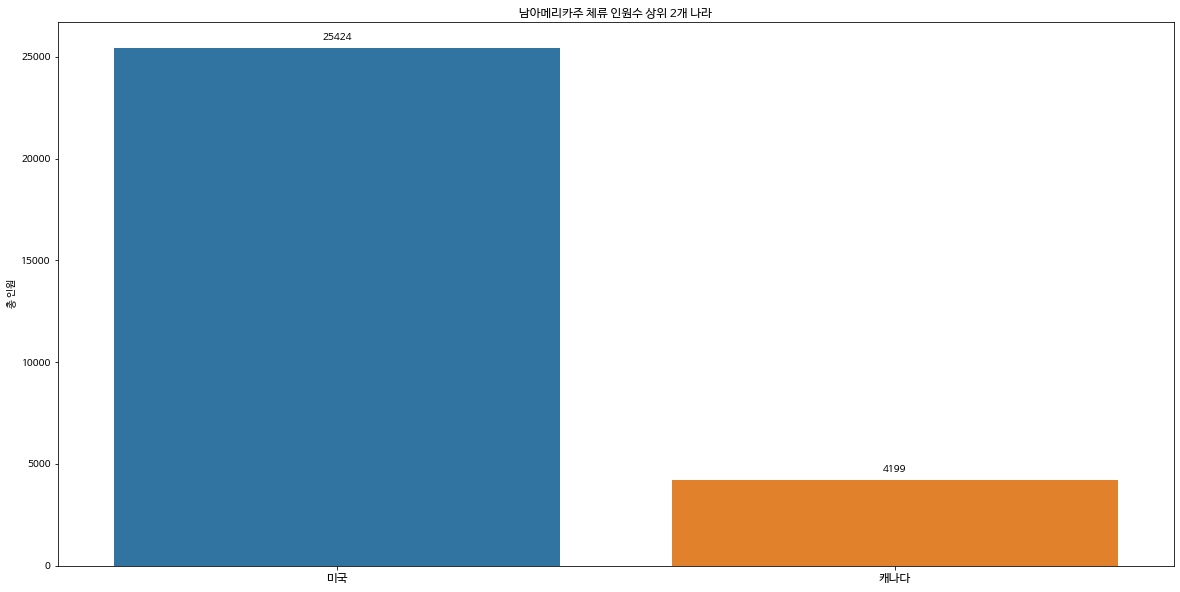

In [260]:
plt.figure(figsize=(20,10))
g_south = sns.barplot(data = df_south, x = df_south.index, y = '총 인원', ci=None)

for p in g_south.patches:
    g_south.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('남아메리카주 체류 인원수 상위 2개 나라')
plt.show()

In [261]:
df_final.loc['아시아주'].sort_values(by='총 인원', ascending=False)

,취업,거주,학업,국외활동,기타,총 인원
국적,,,,,,
한국계중국인,193268,137377,1531,71,272,332519
중국,7954,113582,70346,1452,14581,207915
베트남,44840,83287,55557,64,3549,187297
우즈베키스탄,33128,11872,10191,88,948,56227
필리핀,25164,15669,846,149,3447,45275
캄보디아,37198,7160,450,14,193,45015
네팔,35072,1993,2400,97,1359,40921
인도네시아,33215,1528,1659,41,585,37028
타이,24816,5779,640,119,1271,32625


In [262]:
asia_data = {'총 인원':pd.Series([332519,207915,187297],['한국계중국인','중국','베트남'])}
df_asia = pd.DataFrame(asia_data)
df_asia

,총 인원
한국계중국인,332519
중국,207915
베트남,187297


In [263]:
trace5 = go.Bar(x=df_asia.index, y=df_asia['총 인원'])
data = [trace5]
layout5 = go.Layout(title='아시아주 체류 인원수 상위 3개')
fig5 = go.Figure(data=data, layout=layout5)
pyo.iplot(fig5)

## 아시아주 상위 3개 나라

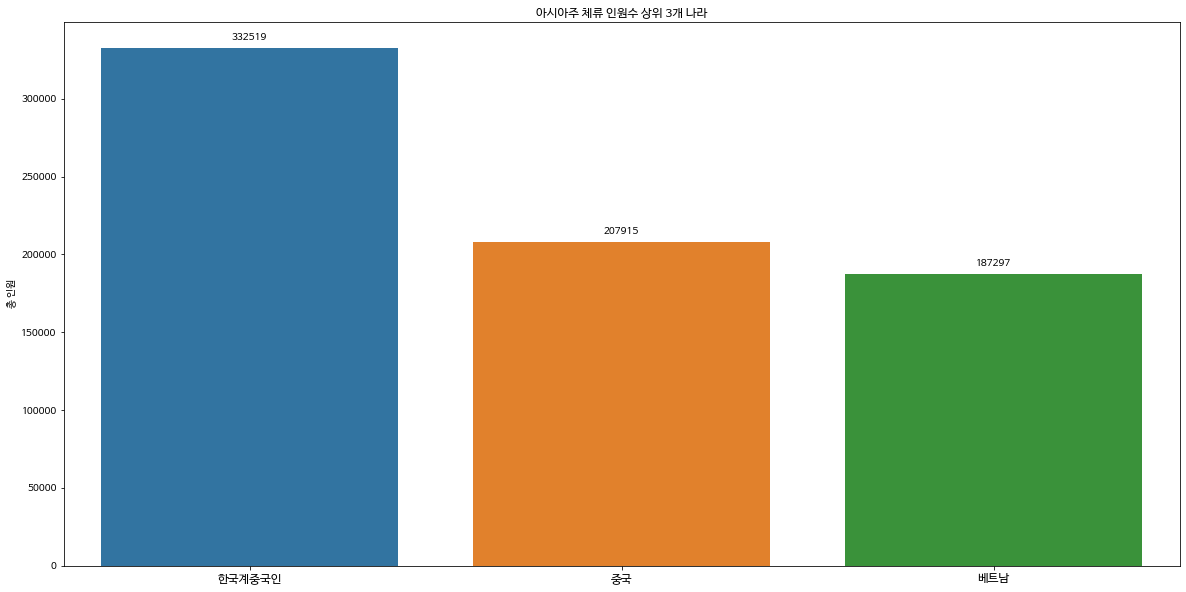

In [264]:
plt.figure(figsize=(20,10))
g_asia = sns.barplot(data = df_asia, x = df_asia.index, y = '총 인원', ci=None)

for p in g_asia.patches:
    g_asia.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('아시아주 체류 인원수 상위 3개 나라')
plt.show()

## 유럽주 상위 3개 나라

In [265]:
df_final.loc['유럽주'].sort_values(by='총 인원', ascending=False)

,취업,거주,학업,국외활동,기타,총 인원
국적,,,,,,
러시아(연방),158,6871,1023,170,4518,12740
영국,1678,1501,289,283,521,4272
프랑스,513,1147,1221,334,431,3646
우크라이나,1670,1036,149,17,337,3209
독일,205,719,791,229,285,2229
한국계러시아인,12,1330,13,0,5,1360
이탈리아,83,270,223,124,144,844
스페인,81,209,239,44,120,693
네덜란드,48,154,266,86,72,626


In [266]:
eur_data = {'총 인원':pd.Series([12740,4272,3646],['러시아(연방)','영국','프랑스'])}
df_eur = pd.DataFrame(eur_data)
df_eur

,총 인원
러시아(연방),12740
영국,4272
프랑스,3646


In [267]:
trace5 = go.Bar(x=df_eur.index, y=df_eur['총 인원'])
data = [trace5]
layout5 = go.Layout(title='유럽주 체류 인원수 상위 3개')
fig5 = go.Figure(data=data, layout=layout5)
pyo.iplot(fig5)

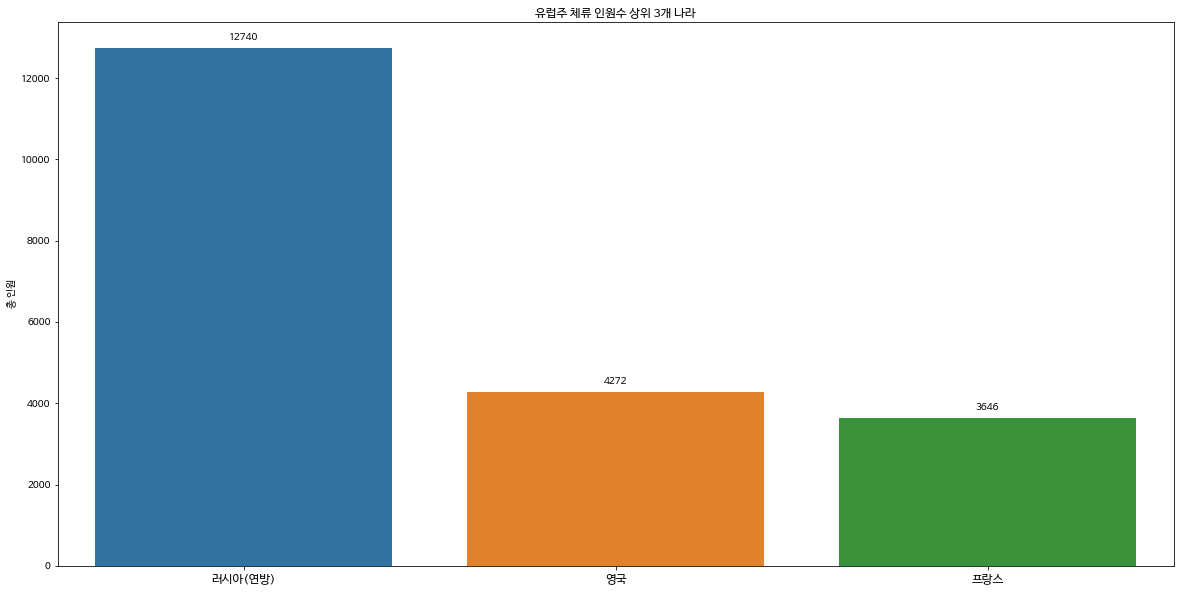

In [268]:
plt.figure(figsize=(20,10))
g_eur = sns.barplot(data = df_eur, x = df_eur.index, y = '총 인원', ci=None)

for p in g_eur.patches:
    g_eur.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('유럽주 체류 인원수 상위 3개 나라')
plt.show()

## 오세아니아주 상위 3개 나라

In [269]:
df_final.loc['오세아니아주'].sort_values(by='총 인원', ascending=False)

,취업,거주,학업,국외활동,기타,총 인원
국적,,,,,,
오스트레일리아,346,770,121,88,324,1649
뉴질랜드,197,390,16,19,109,731
피지,0,24,18,0,22,64
키리바시,0,0,21,0,0,21
솔로몬군도,0,2,6,0,1,9
바누아투,0,4,1,0,0,5
파푸아뉴기니,0,1,2,0,0,3
팔라우,0,2,1,0,0,3
나우루,1,0,0,1,0,2


In [270]:
os_data = {'총 인원':pd.Series([1649,731,64],['오스트레일리아','뉴질랜드','피지'])}
df_os = pd.DataFrame(os_data)
df_os

,총 인원
오스트레일리아,1649
뉴질랜드,731
피지,64


In [271]:
trace5 = go.Bar(x=df_os.index, y=df_os['총 인원'])
data = [trace5]
layout5 = go.Layout(title='오세아니아주 체류 인원수 상위 3개')
fig5 = go.Figure(data=data, layout=layout5)
pyo.iplot(fig5)

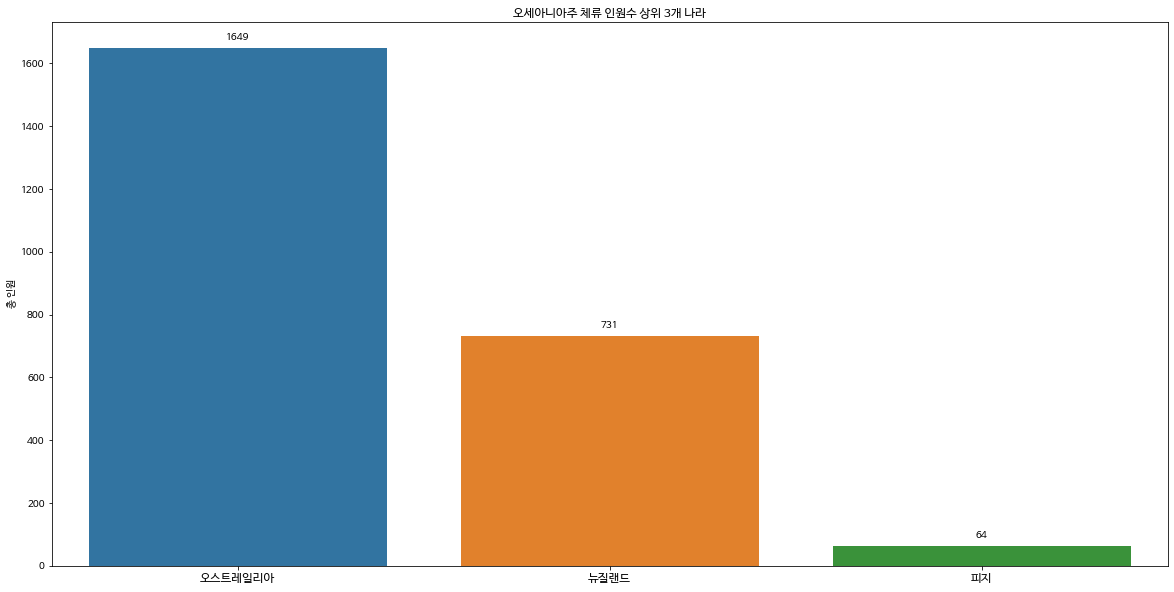

In [272]:
plt.figure(figsize=(20,10))
g_os = sns.barplot(data = df_os, x = df_os.index, y = '총 인원', ci=None)

for p in g_os.patches:
    g_os.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('오세아니아주 체류 인원수 상위 3개 나라')
plt.show()

## 기타 상위 3개 나라

In [273]:
df_final.loc['기타'].sort_values(by='총 인원', ascending=False)

,취업,거주,학업,국외활동,기타,총 인원
국적,,,,,,
무국적,1,94,4,0,7,106
미등록국가,2,32,14,0,0,48
국제연합,0,0,0,0,25,25


In [274]:
others_data = {'총 인원':pd.Series([106,48,25],['무국적','미등록국가','국제연합'])}
df_others = pd.DataFrame(others_data)
df_others

,총 인원
무국적,106
미등록국가,48
국제연합,25


In [275]:
trace6 = go.Bar(x=df_others.index, y=df_others['총 인원'])
data = [trace6]
layout6 = go.Layout(title='기타주 체류 인원수 상위 3개')
fig6 = go.Figure(data=data, layout=layout6)
pyo.iplot(fig6)

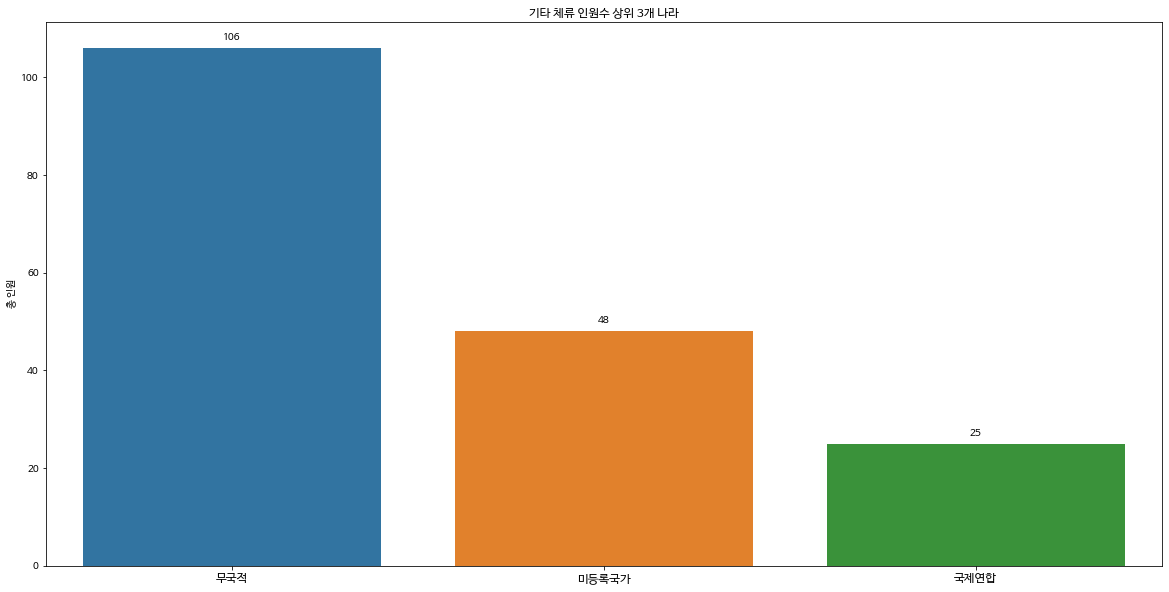

In [276]:
plt.figure(figsize=(20,10))
g_others = sns.barplot(data = df_others, x = df_others.index, y = '총 인원', ci=None)

for p in g_others.patches:
    g_others.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('기타 체류 인원수 상위 3개 나라')
plt.show()

# 체류 목적별 상위 5개 나라 확인

## 취업 체류 인구수 5개의 나라 확인

In [277]:
df_final.sort_values(by='취업', ascending=False)

취업      거주     학업  국외활동    기타    총 인원
대륙   국적                                               
아시아주 한국계중국인  193268  137377   1531    71   272  332519
     베트남      44840   83287  55557    64  3549  187297
     캄보디아     37198    7160    450    14   193   45015
     네팔       35072    1993   2400    97  1359   40921
     인도네시아    33215    1528   1659    41   585   37028
...             ...     ...    ...   ...   ...     ...
     몰디브          0       1      3     0     0       4
유럽주  마케도니아        0       4      1     0     3       8
     몬테네그로        0       0      3     1     2       6
     몰타           0       4      1     0     2       7
기타   국제연합         0       0      0     0    25      25

[192 rows x 6 columns]

In [278]:
work_data = {'총 인원':pd.Series([193268,44840,37198,35072,33215],['한국계중국인','베트남','캄보디아','네팔','인도네시아'])}
df_work = pd.DataFrame(work_data)
df_work

,총 인원
한국계중국인,193268
베트남,44840
캄보디아,37198
네팔,35072
인도네시아,33215


In [279]:
trace7 = go.Bar(x=df_work.index, y=df_work['총 인원'])
data = [trace7]
layout7 = go.Layout(title='취업 체류 인원수 상위 5개 나라')
fig7 = go.Figure(data=data, layout=layout7)
pyo.iplot(fig7)

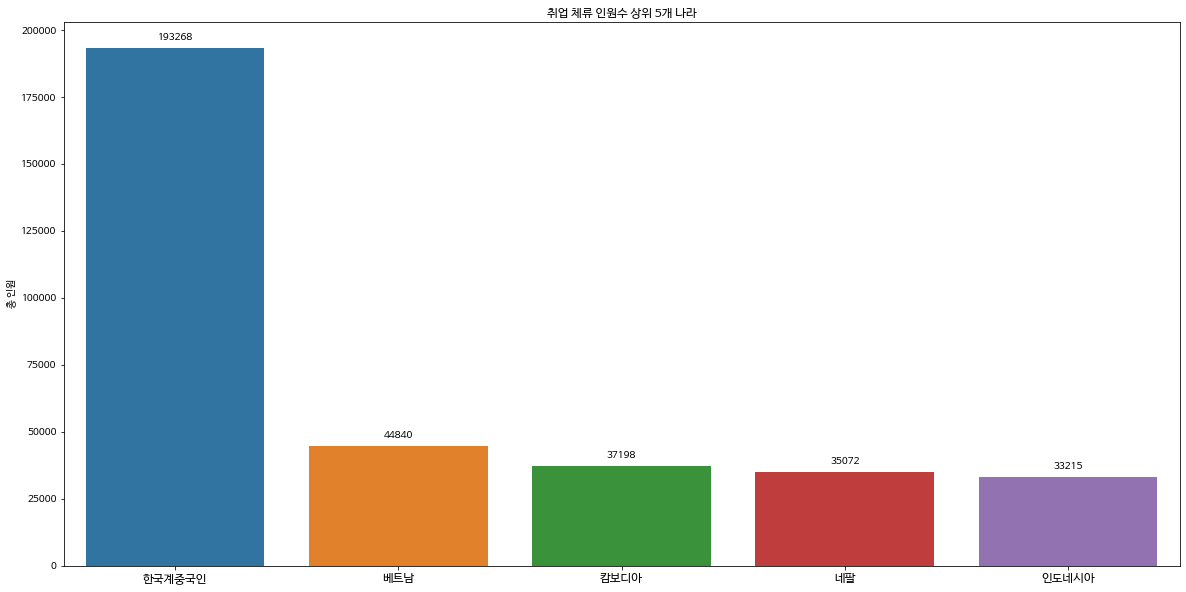

In [280]:
plt.figure(figsize=(20,10))
g_work = sns.barplot(data = df_work, x = df_work.index, y = '총 인원', ci=None)

for p in g_work.patches:
    g_work.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('취업 체류 인원수 상위 5개 나라')
plt.show()

## 거주 체류 인원수 상위 5개 나라

In [281]:
df_final.sort_values(by='거주', ascending=False)

취업      거주     학업  국외활동     기타    총 인원
대륙    국적                                                
아시아주  한국계중국인  193268  137377   1531    71    272  332519
      중국        7954  113582  70346  1452  14581  207915
      베트남      44840   83287  55557    64   3549  187297
      타이완        694   17559   1118   111    376   19858
      일본        1272   16585   3272  2102    979   24210
...              ...     ...    ...   ...    ...     ...
아프리카주 지부티          0       0      1     0      0       1
아시아주  오만           0       0      8     0     19      27
아프리카주 세이셸          0       0      0     0      1       1
      레소토          1       0      4     0      0       5
기타    국제연합         0       0      0     0     25      25

[192 rows x 6 columns]

In [282]:
live_data = {'총 인원':pd.Series([137377,113582,83287,17559,16585],['한국계중국인','중국','베트남','타이완','일본'])}
df_live = pd.DataFrame(live_data)
df_live

,총 인원
한국계중국인,137377
중국,113582
베트남,83287
타이완,17559
일본,16585


In [283]:
trace8 = go.Bar(x=df_live.index, y=df_live['총 인원'])
data = [trace8]
layout8 = go.Layout(title='거주 체류 인원수 상위 5개 나라')
fig8 = go.Figure(data=data, layout=layout8)
pyo.iplot(fig8)

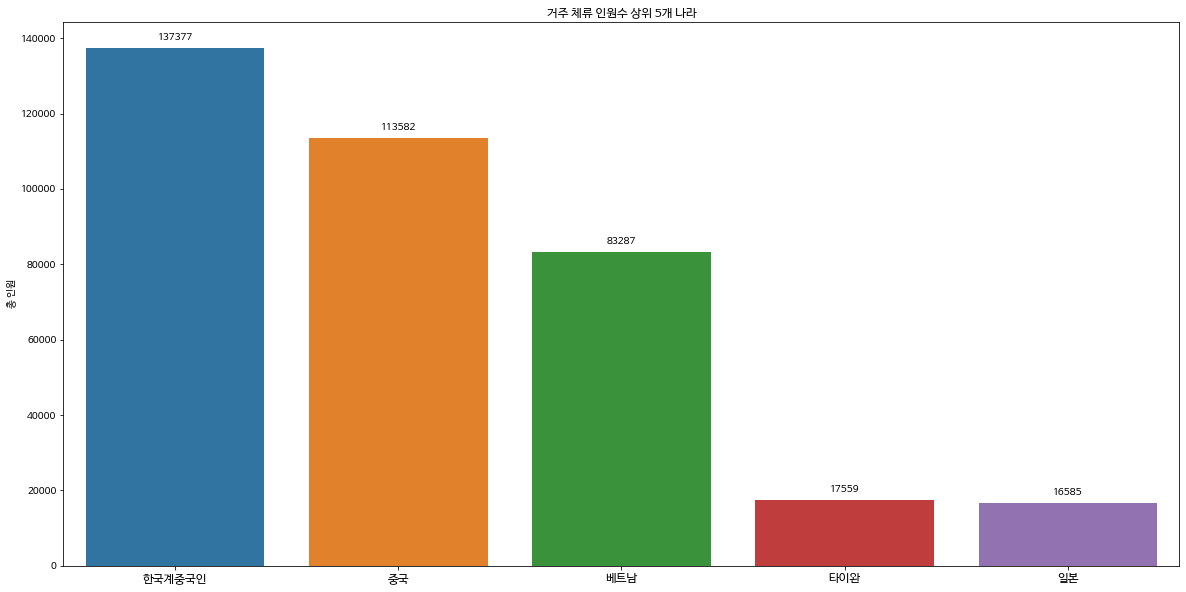

In [284]:
plt.figure(figsize=(20,10))
g_live = sns.barplot(data = df_live, x = df_live.index, y = '총 인원', ci=None)

for p in g_live.patches:
    g_live.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('거주 체류 인원수 상위 5개 나라')
plt.show()

## 학업 체류 인원수 상위 5개 나라

In [285]:
df_final.sort_values(by='학업', ascending=False)

취업      거주     학업  국외활동     기타    총 인원
대륙     국적                                               
아시아주   중국       7954  113582  70346  1452  14581  207915
       베트남     44840   83287  55557    64   3549  187297
       우즈베키스탄  33128   11872  10191    88    948   56227
       몽골       6573    7960   8753   181   1372   24839
       일본       1272   16585   3272  2102    979   24210
...              ...     ...    ...   ...    ...     ...
오세아니아주 통가          0       1      0     1      0       2
       나우루         1       0      0     1      0       2
아프리카주  세이셸         0       0      0     0      1       1
       니제르         0       3      0     0      2       5
기타     국제연합        0       0      0     0     25      25

[192 rows x 6 columns]

In [286]:
study_data = {'총 인원':pd.Series([70346,55557,10191,8753,3272],['중국','베트남','우즈베키스탄','몽골','일본'])}
df_study = pd.DataFrame(study_data)
df_study

,총 인원
중국,70346
베트남,55557
우즈베키스탄,10191
몽골,8753
일본,3272


In [287]:
trace8 = go.Bar(x=df_study.index, y=df_study['총 인원'])
data = [trace8]
layout8 = go.Layout(title='학업 체류 인원수 상위 5개 나라')
fig8 = go.Figure(data=data, layout=layout8)
pyo.iplot(fig8)

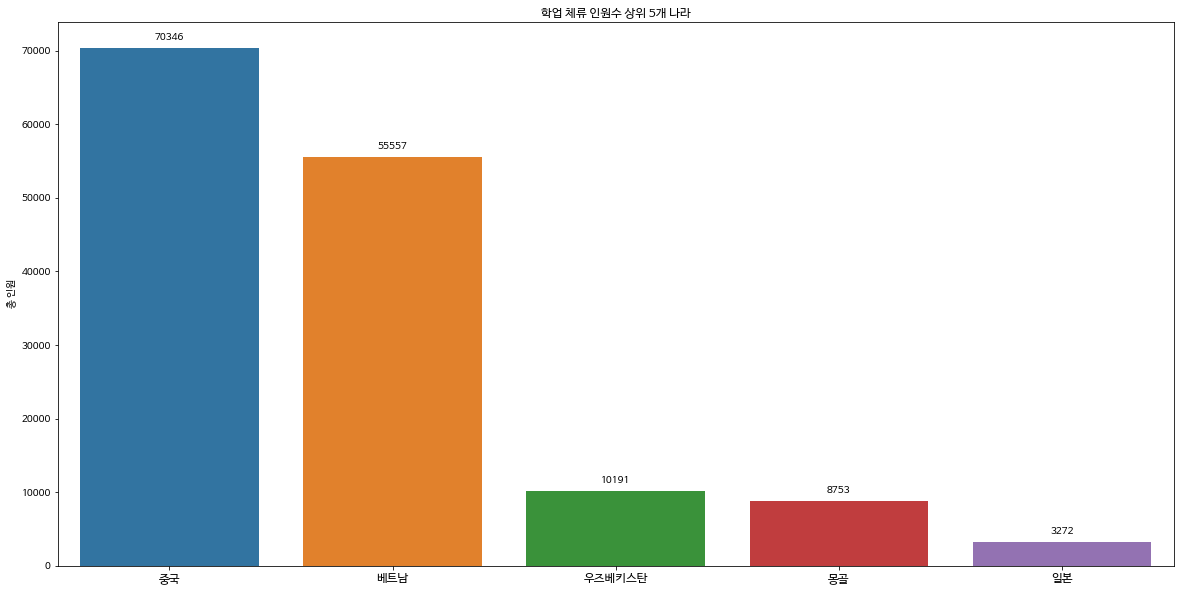

In [288]:
plt.figure(figsize=(20,10))
g_study = sns.barplot(data = df_study, x = df_study.index, y = '총 인원', ci=None)

for p in g_study.patches:
    g_study.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('학업 체류 인원수 상위 5개 나라')
plt.show()

## 국외활동 체류 인구수 상위 5개 나라

In [289]:
df_final.sort_values(by='국외활동', ascending=False)

취업      거주     학업  국외활동     기타    총 인원
대륙     국적                                              
아시아주   일본      1272   16585   3272  2102    979   24210
       중국      7954  113582  70346  1452  14581  207915
북아메리카주 미국      7461    7693   1488   697   8085   25424
아시아주   인도       115    2935   2583   535   3686    9854
       파키스탄    3274    2628   2053   444   3093   11492
...             ...     ...    ...   ...    ...     ...
아프리카주  말라위        3       1     14     0      6      24
       마다가스카르     1      13     12     0      3      29
기타     무국적        1      94      4     0      7     106
아프리카주  레소토        1       0      4     0      0       5
       르완다       14      29    156     0     45     244

[192 rows x 6 columns]

In [290]:
act_data = {'총 인원':pd.Series([2102,1452,697,535,444],['일본','중국','미국','인도','파키스탄'])}
df_act = pd.DataFrame(act_data)
df_act

,총 인원
일본,2102
중국,1452
미국,697
인도,535
파키스탄,444


In [291]:
trace8 = go.Bar(x=df_act.index, y=df_act['총 인원'])
data = [trace8]
layout8 = go.Layout(title='학업 체류 인원수 상위 5개 나라')
fig8 = go.Figure(data=data, layout=layout8)
pyo.iplot(fig8)

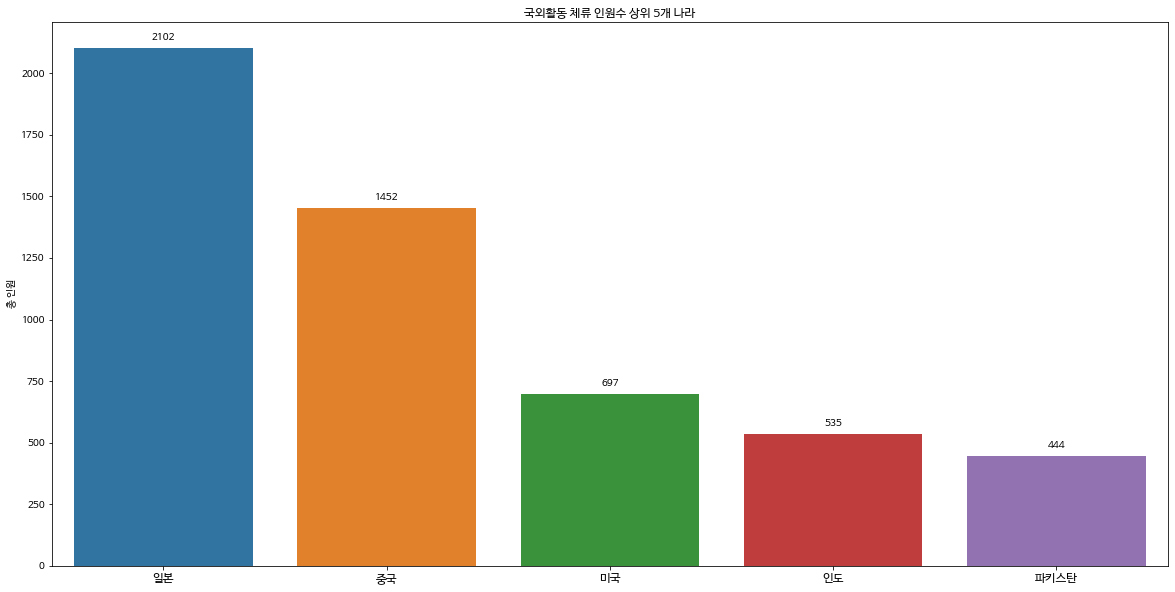

In [292]:
plt.figure(figsize=(20,10))
g_act = sns.barplot(data = df_act, x = df_act.index, y = '총 인원', ci=None)

for p in g_act.patches:
    g_act.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('국외활동 체류 인원수 상위 5개 나라')
plt.show()

## 기타 체류 인구수 상위 5개 나라

In [293]:
df_final.sort_values(by='기타', ascending=False)

취업      거주     학업  국외활동     기타    총 인원
대륙     국적                                               
아시아주   중국       7954  113582  70346  1452  14581  207915
북아메리카주 미국       7461    7693   1488   697   8085   25424
유럽주    러시아(연방)   158    6871   1023   170   4518   12740
아시아주   카자흐스탄    7755    4262    986    44   4446   17493
       인도        115    2935   2583   535   3686    9854
...              ...     ...    ...   ...    ...     ...
남아메리카주 벨리즈         0       1      2     0      0       3
       바하마         0       0      6     0      0       6
아시아주   몰디브         0       1      3     0      0       4
남아메리카주 바베이도스       0       0      2     0      0       2
오세아니아주 나우루         1       0      0     1      0       2

[192 rows x 6 columns]

In [294]:
other_data = {'총 인원':pd.Series([14581,8085,4518,4446,3686],['중국','미국','러시아(연방)','카자흐스탄','인도'])}
df_other = pd.DataFrame(other_data)
df_other

,총 인원
중국,14581
미국,8085
러시아(연방),4518
카자흐스탄,4446
인도,3686


In [295]:
trace9 = go.Bar(x=df_other.index, y=df_other['총 인원'])
data = [trace9]
layout9 = go.Layout(title='기타 체류 인원수 상위 5개 나라')
fig9 = go.Figure(data=data, layout=layout9)
pyo.iplot(fig9)

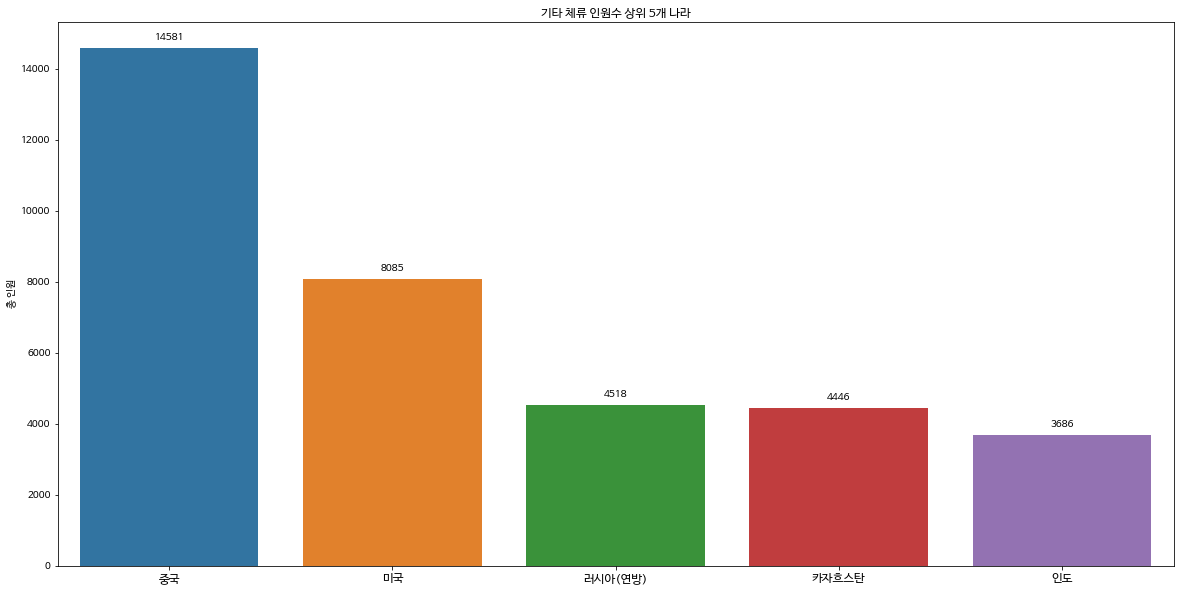

In [296]:
plt.figure(figsize=(20,10))
g_other = sns.barplot(data = df_other, x = df_other.index, y = '총 인원', ci=None)

for p in g_other.patches:
    g_other.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
    
plt.xticks(fontsize = 12, rotation = 0)
plt.title('기타 체류 인원수 상위 5개 나라')
plt.show()

# 최종 비교를 위한 데이터 프레임 생성

In [297]:
# df_final.loc['아시아주','한국계중국인']['총 인원']
# df_final.loc['오세아니아주','오스트레일리아']['총 인원']
# df_final.loc['북아메리카주','미국']['총 인원']
# df_final.loc['남아메리카주','브라질']['총 인원']
# df_final.loc['유럽주','러시아(연방)']['총 인원']
# df_final.loc['기타','무국적']['총 인원']
# 주석을 풀면서 하나씩 값 확인

In [298]:
compare_data = {'총 인원':pd.Series([332519,1649,25424,785,12740,106],['한국계중국인','오스트레일리아','미국','브라질','러시아(연방)','기타'])}
df_compare = pd.DataFrame(compare_data)


In [299]:
df_compare

,총 인원
한국계중국인,332519
오스트레일리아,1649
미국,25424
브라질,785
러시아(연방),12740
기타,106


# 최종 비교 그래프 시각화

In [300]:
trace10 = go.Bar(x=df_compare.index, y=df_compare['총 인원'])
data = [trace10]
layout10 = go.Layout(title='각 대륙별 체류 인원이 가장 많은 나라의 총 인원')
fig10 = go.Figure(data=data, layout=layout10)
pyo.iplot(fig10)

In [301]:
df_last2 =  df_last.max().to_frame()
df_last2

,0
취업,193268
거주,137377
학업,70346
국외활동,2102
기타,14581


In [302]:
trace11 = go.Bar(x=df_last2.index, y=df_last2[0])
data = [trace11]
layout11 = go.Layout(title='체류 목적별 총 인원')
fig11 = go.Figure(data=data, layout=layout11)
pyo.iplot(fig11)

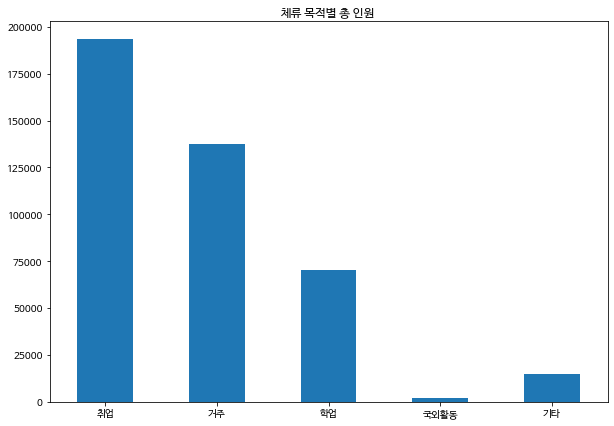

In [303]:
df_last.max().plot.bar(rot = 0, figsize = (10,7), title = '체류 목적별 총 인원 ')
# 방문 사유중 취업이 가장 많은 범위를 차지함을 알 수 있음.